## **MÉTRICAS PARA CLASIFICADORES**

- **Indice de Jaccard**: también conocido como el coeficiente de similitud de Jaccard se puede definir como el tamaño de la intersección dividido por el tamaño de la unión de dos conjuntos.

$$Jaccard(y, \hat{y}) = \frac{\left | y \cap \hat{y} \right |}{\left | y \right | + \left | \hat{y} \right | - \left | y \cap \hat{y} \right |}$$


- **Matriz de confusión**: La matriz de confusión es una herramienta utilizada principalmente en estadística y machine learning que evalúa la precisión de una clasificación. Dentro de sus ventajas se encuentra la de poder observar en una matriz, los porcentajes de predicciones correctas e incorrectas por clase. La matriz muestra las predicciones correctas y equivocadas, en comparación con los valores reales. 

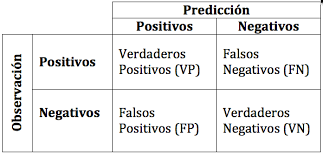


- **Accuracy (Exactitud o Rendimiento)**: Proporciona información sobre el porcentaje de patrones clasificados correctamente. Para clases desbalanceadas es mejor utilizar otra métrica.

$$Accuracy = \frac{VP + VN}{VP + FN + FP + VN}$$

- **Precision**: La precisión mide la habilidad del clasificador para no predecir un caso negativo como un caso positivo.

$$Precision = \frac{VP }{VP + FP}$$

- **Recall (Sensibilidad o  Exhaustividad)**: Es la habilidad del clasificador para predecir casos positivos como positivos. Esta métrica se suele utilizar en el ámbito médico debido a que da prioridad a predicción o clasificación de pacientes enfermos como enfermos sin dar el mismo nivel de importancia si un paciente sano se clasifica como enfermo.

$$Recall = \frac{VP + VN}{VP + FN}$$


- **Specificity (Especificidad)**: Muestra la habilidad del clasificador para predecir verdaderos negativos reales correctamente. 

$$ Specificity = \frac{VN}{VN + FP}$$


- **F1-Score**: Es la media armónica entre la precisión y la sensibilidad.

$$F1 = 2 * \frac{Precision * Recall}{Precision + Recall}$$


- **Curva ROC (Receiver Operating Characteristics/Característica Operativa del Receptor)**:

    Es la representación de la proporción de verdaderos positivos frente a la proporción de falsos positivos.
    
    Es una curva que se grafica a través de los siguientes ejes: 
    - **Eje Y**: Recall.
    - **Eje X**: 1 - Specificity.

### **LIBRERÍAS NECESARIAS**

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# SEPARACIÓN TRAIN Y TEST
from sklearn.model_selection import train_test_split

# MODELO
from sklearn.neighbors import KNeighborsClassifier

# CONSEGUIR DATASETS DE SKLEARN
from sklearn import datasets

# MÉTRICAS
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

### **DATASEST Y SEPARACIÓN TRAIN Y TEST**

In [57]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

In [59]:
len(y)

150

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Train: {X_test.shape}, {y_test.shape}")

Train: (105, 4), (105,)
Train: (45, 4), (45,)


### **MODELO Y PREDICCIONES**

In [4]:
clf = KNeighborsClassifier(3)
clf.fit(X_train, y_train)

yhat = clf.predict(X_test)
yhat

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

## **MÉTRICAS**

In [5]:
print("Similitud (JACCARD INDEX):", jaccard_score(y_test, yhat, average = "macro"))
print("Exactitud (ACURACY):"    , accuracy_score(y_test, yhat))
print("Precisión (PRECISION):"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad (RECALL):" , recall_score(y_test, yhat, average = "macro"))
print("F1-score (PRECISION + RECALL):"     , f1_score(y_test, yhat, average = "macro"))

Similitud (JACCARD INDEX): 1.0
Exactitud (ACURACY): 1.0
Precisión (PRECISION): 1.0
Sensibilidad (RECALL): 1.0
F1-score (PRECISION + RECALL): 1.0


**Matriz de confusion**

![Texto alternativo](../Imagenes%20Notebooks/Matriz_clasificacion.png)

La matriz de confusión es una herramienta que se utiliza en el campo de la clasificación de modelos para evaluar el rendimiento de un algoritmo de aprendizaje automático. Se utiliza comúnmente en problemas de clasificación binaria y también se puede extender a problemas de clasificación multiclase.

En el contexto del modelo Gaussian Naive Bayes (GaussianNB), que es un clasificador probabilístico basado en el teorema de Bayes con la suposición de independencia condicional entre las características, la matriz de confusión muestra la cantidad de predicciones correctas e incorrectas hechas por el modelo en cada clase.

La matriz de confusión generalmente tiene cuatro entradas:

- **Verdaderos positivos (TP):** La cantidad de instancias positivas que fueron clasificadas correctamente como positivas por el modelo.
  
- **Falsos positivos (FP):** La cantidad de instancias negativas que fueron incorrectamente clasificadas como positivas por el modelo.

- **Falsos negativos (FN):** La cantidad de instancias positivas que fueron incorrectamente clasificadas como negativas por el modelo.

- **Verdaderos negativos (TN):** La cantidad de instancias negativas que fueron clasificadas correctamente como negativas por el modelo. Se encuentran en la suma de los elementos fuera de la fila y columna de cada clase en la matriz_confusion

A partir de estas cuatro métricas, se pueden derivar diversas métricas de evaluación del rendimiento del modelo, como la precisión, la sensibilidad, la especificidad y la puntuación F1.

La interpretación de la matriz de confusión es esencial para comprender cómo se está desempeñando un modelo en tareas específicas y para identificar posibles áreas de mejora. Puedes utilizar funciones de bibliotecas de Python como scikit-learn para calcular y visualizar la matriz de confusión en el contexto de un modelo GaussianNB.

### Para una matriz de confusión 2x2:

1. **TP (Verdaderos Positivos):**
   $ TP = \text{C1,1} $

2. **FP (Falsos Positivos):**
   $ FP = \text{C2,1} $

3. **TN (Verdaderos Negativos):**
   $ TN = \text{C2,2} $

4. **FN (Falsos Negativos):**
   $ FN = \text{C1,2} $

![Texto alternativo](../Imagenes%20Notebooks/Matriz_clasificación_2x2.png)

### Para una matriz de confusión nxn (n > 2):

Dado que hay más clases, las fórmulas son un poco más complicadas. Supongamos que $ N $ es el número de clases. En este caso, $ C_{i,j} $ representa el número de instancias de la clase $ i $ que fueron clasificadas como clase $ j $.

1. **TP (Verdaderos Positivos) para la clase \( k \):**
   $ TP_k = C_{k,k} $

2. **FP (Falsos Positivos) para la clase \( k \):**
   $ FP_k = \sum_{i=1, i\neq k}^{N} C_{i,k} $

3. **TN (Verdaderos Negativos) para la clase \( k \):**
   $ TN_k = \sum_{i=1, i\neq k}^{N} \sum_{j=1, j\neq k}^{N} C_{i,j} $

4. **FN (Falsos Negativos) para la clase \( k \):**
   $ FN_k = \sum_{j=1, j\neq k}^{N} C_{k,j} $

Estas fórmulas permiten calcular las métricas de rendimiento para cada clase en un problema de clasificación con más de dos clases. Puedes usar estas métricas para evaluar el rendimiento del modelo en cada clase por separado.
```

![Texto alternativo](../Imagenes%20Notebooks/Ejemplo_matriz_confusión_3x3.png)

In [27]:
matriz_confusion = confusion_matrix(y_test, yhat, labels = [0, 1, 2]) 

In [28]:
matriz_confusion[0] # Accedemos a la fila 0..

array([19,  0,  0], dtype=int64)

In [30]:
columna_0 = [fila[0] for fila in matriz_confusion] # Accediendo a la columna
columna_0

[19, 0, 0]

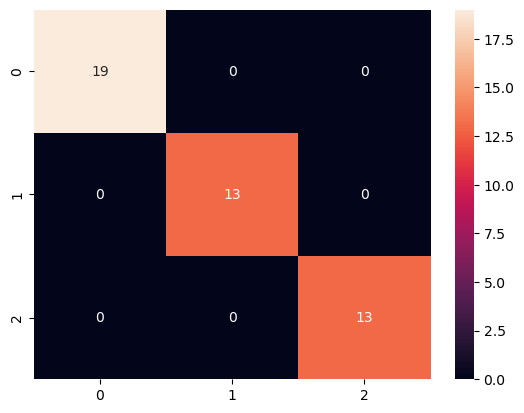

In [32]:
sns.heatmap(matriz_confusion, annot=True)

### **REPORTE CLASIFICADOR** (Classification Report)

El método `classification_report` en scikit-learn genera un informe de clasificación que proporciona varias métricas útiles para evaluar el rendimiento de un modelo de clasificación. Este informe incluye precision, recall, f1-score y support para cada clase, así como el promedio ponderado de estas métricas. La información se presenta de manera tabular para facilitar su lectura.

Aquí hay una descripción general de las métricas que generalmente se incluyen en el informe de clasificación:

1. **Precision (Precisión):** La precisión es la proporción de verdaderos positivos (TP) con respecto a la suma de verdaderos positivos y falsos positivos (FP). Se calcula como \( \frac{TP}{TP + FP} \). Mide la exactitud de las predicciones positivas del modelo.

2. **Recall (Recuperación o Sensibilidad):** El recall es la proporción de verdaderos positivos (TP) con respecto a la suma de verdaderos positivos y falsos negativos (FN). Se calcula como \( \frac{TP}{TP + FN} \). Mide la capacidad del modelo para capturar todas las instancias positivas.

3. **F1-Score:** El F1-Score es la media armónica de precisión y recall. Se calcula como \( \frac{2 \cdot \text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} \). Proporciona un equilibrio entre precisión y recall.

4. **Support:** El soporte es el número total de instancias de la clase en los datos reales.

El informe de clasificación generalmente se presenta en una tabla que muestra estas métricas para cada clase, así como el promedio ponderado de las métricas para todas las clases.

La impresión de `classification_report(y_test, yhat, digits=3)` mostrará este informe para las predicciones `yhat` en comparación con las etiquetas reales `y_test`. La opción `digits=3` controla la cantidad de dígitos que se muestran en las métricas. Este informe es una herramienta útil para comprender cómo se está desempeñando tu modelo en cada clase y para identificar áreas que podrían necesitar mejora.

In [33]:
print(classification_report(y_test, yhat, digits = 3)) # el parámetro digits especifica la cantidad de dígitos a mostrar después del punto decimal en los resultados

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        19
           1      1.000     1.000     1.000        13
           2      1.000     1.000     1.000        13

    accuracy                          1.000        45
   macro avg      1.000     1.000     1.000        45
weighted avg      1.000     1.000     1.000        45



En el contexto del informe de clasificación generado por `classification_report` en scikit-learn, las líneas "accuracy", "macro avg" y "weighted avg" representan diferentes métricas de resumen que resaltan el rendimiento general del modelo en diferentes aspectos.

1. **Accuracy (Precisión Global):** La línea "accuracy" indica la precisión global del modelo, es decir, la proporción de instancias clasificadas correctamente (verdaderos positivos y verdaderos negativos) entre el total de instancias. Se calcula como \(\frac{TP + TN}{TP + TN + FP + FN}\).

2. **Macro Avg (Promedio Macro):** La línea "macro avg" muestra el promedio no ponderado de las métricas para cada clase. Calcula las métricas para cada clase por separado y luego toma el promedio simple de esas métricas. Esto no tiene en cuenta el desequilibrio de clases.

3. **Weighted Avg (Promedio Ponderado):** La línea "weighted avg" muestra el promedio ponderado de las métricas para cada clase, donde el peso se calcula como el soporte (número de instancias) de cada clase. Este promedio tiene en cuenta el desequilibrio de clases, por lo que las clases con más instancias tienen un impacto mayor en el resultado final.

En resumen:

- **Accuracy:** Mide la precisión global del modelo.
  
- **Macro Avg:** Ofrece un promedio no ponderado de las métricas para cada clase.

- **Weighted Avg:** Proporciona un promedio ponderado de las métricas, teniendo en cuenta el desequilibrio de clases.

Estas métricas te brindan diferentes perspectivas sobre el rendimiento del modelo, y es importante considerarlas en conjunto para obtener una comprensión completa.

### **CURVA ROC**

Una curva ROC es un gráfico que resume el rendimiento de un modelo de clasificación binaria en la clase positiva.

La curva ROC (Receiver Operating Characteristic) es una representación gráfica que ilustra el rendimiento de un clasificador binario en diferentes niveles de umbral. En una curva ROC, se traza la tasa de verdaderos positivos (TPR o sensibilidad) en el eje y contra la tasa de falsos positivos (FPR) en el eje x para diferentes umbrales de decisión.

Aquí hay algunos elementos clave que se pueden observar en una curva ROC:

1. **Sensibilidad (TPR):** Representa la proporción de positivos reales que se clasificaron correctamente como positivos. A medida que el umbral de decisión disminuye, la sensibilidad tiende a aumentar.

2. **Tasa de Falsos Positivos (FPR):** Representa la proporción de negativos reales que se clasificaron incorrectamente como positivos. A medida que el umbral de decisión disminuye, la FPR también tiende a aumentar.

3. **Área bajo la curva (AUC-ROC):** Es una métrica numérica que resume el rendimiento del clasificador en términos de sensibilidad y FPR. Un AUC-ROC más alto indica un mejor rendimiento del clasificador. Un AUC-ROC de 0.5 sugiere un rendimiento similar al azar, mientras que un AUC-ROC de 1.0 indica un rendimiento perfecto.

4. **Línea de referencia:** La línea diagonal desde (0,0) hasta (1,1) representa el rendimiento de un clasificador aleatorio.

Al observar la curva ROC, idealmente, quieres que la curva se acerque lo más posible al rincón superior izquierdo, lo que indica altas tasas de verdaderos positivos y bajas tasas de falsos positivos. Sin embargo, la elección del umbral óptimo dependerá de la naturaleza específica del problema y de tus preferencias en cuanto a sensibilidad y especificidad.

En resumen, la curva ROC proporciona una representación visual de cómo cambia el rendimiento de un clasificador binario a medida que ajustas el umbral de decisión y te permite evaluar el equilibrio entre sensibilidad y especificidad.

**Solo para clasificación binaria.**

In [106]:
df = pd.read_csv("../Data/iris.csv")

In [107]:
df["Clase"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [108]:
df = df[(df["Clase"]== "Iris-versicolor") | (df["Clase"]== "Iris-virginica")]

In [109]:
df['Clase'] = df['Clase'].apply(lambda x: 0 if x == 'Iris-versicolor' else 1)

In [110]:
X_ana = np.array(df.drop("Clase", axis= 1))

In [111]:
y_ana = np.array(df["Clase"])

In [112]:
# Hago el dataset binario

X_train, X_test, y_train, y_test = train_test_split(X_ana, y_ana, test_size = 0.3, random_state = 42)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Train: {X_test.shape}, {y_test.shape}")

Train: (70, 4), (70,)
Train: (30, 4), (30,)


In [113]:
# Entreno el modelo

clf = KNeighborsClassifier(3)
clf.fit(X_train, y_train)

yhat = clf.predict(X_test)

Area bajo la curva: 0.9592760180995475


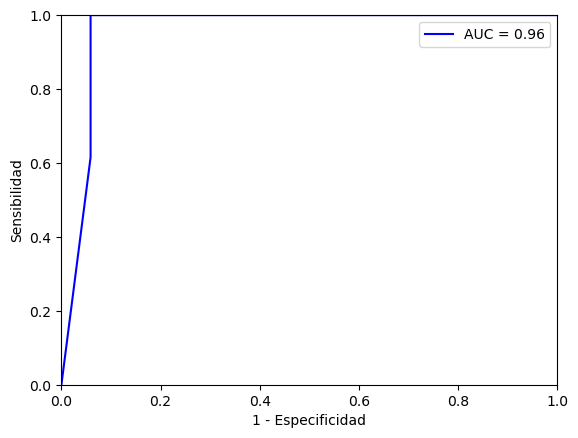

In [114]:
# ROC Plot

probs = clf.predict_proba(X_test)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

print("Area bajo la curva:", auc(fpr, tpr))

plt.plot(fpr, tpr, "b", label = "AUC = %0.2f" % roc_auc)

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.ylabel("Sensibilidad")
plt.xlabel("1 - Especificidad")

plt.legend()

plt.show()

### ROC AUC (Receiver Operating Characteristics Area Under the Curve)

Este área puede interpretarse como la probabilidad de que ante un par de instancias, uno Positivo y uno Negativo, la prueba los clasifique correctamente.

Ésta métrica es de las más utilizada para comparar modelos de clasificación con clases muy desequilibradas.

In [115]:
print("ROC AUC:", roc_auc_score(y_test, yhat))

ROC AUC: 0.8167420814479638


In [ ]:
################################################################################################################################